# Overcome Overfitting

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from sklearn.preprocessing import StandardScaler

# Constants
g = 9.8  # gravity on Earth in m/s^2

# Generate synthetic data
def generate_data(num_samples=1000):
    m = np.random.uniform(1, 1000, num_samples)  # Mass in kg
    F = m * g  # Force (weight) in Newtons
    return m, F

# Generate training and testing data
m_train, F_train = generate_data(800)
m_test, F_test = generate_data(200)

# Reshape the data
m_train = m_train.reshape(-1, 1)  # TensorFlow expects input as (batch_size, num_features)
m_test = m_test.reshape(-1, 1)

'''
scaler = StandardScaler() #Scale the input features to a similar range to help the model learn more efficiently.
m_train = scaler.fit_transform(m_train)
m_test = scaler.transform(m_test)
'''
#Build the model
'''
model = models.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'), # Additional layer
    layers.Dense(1, activation='linear')  # Linear activation for output
])
'''
model = models.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(1, activation='linear')
])
'''
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
'''

# Compile the model with a lower learning rate and a different optimizer
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.00001)

optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001, clipvalue=1.0)
model.compile(optimizer=optimizer, loss='mean_squared_error')

'''
# Train the model
model.fit(m_train, F_train, epochs=100, batch_size=32)
'''

model.fit(m_train, F_train, epochs=100, batch_size=8)

'''
# Compile the model with a lower learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Introduce early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Train the model with validation data and early stopping
model.fit(m_train, F_train, epochs=1000, batch_size=32,
          validation_data=(m_test, F_test), callbacks=[early_stopping])
'''

# Evaluate the model
loss = model.evaluate(m_test, F_test)
print(f"Test Loss: {loss}")

# Make predictions
predictions = model.predict(m_test)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 24079762.0000
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 22608310.0000
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 22996046.0000
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21835508.0000
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21952550.0000
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 22861810.0000
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 21438334.0000
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 23269216.0000
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 21264458.0000
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 22965586.0000
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 22495080.0000
Epoch 12/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 20776344.0000
Epoch 13/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22545040.0000
Epoch 14/100
100/100 

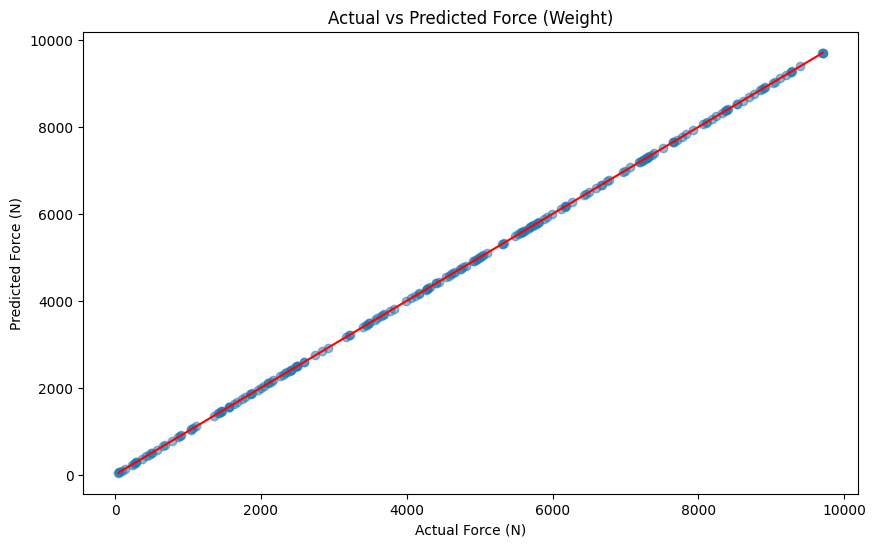

In [7]:
# Compare predictions to actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(F_test, predictions.flatten(), alpha=0.5)
plt.plot([min(F_test), max(F_test)], [min(F_test), max(F_test)], 'r')
plt.xlabel("Actual Force (N)")
plt.ylabel("Predicted Force (N)")
plt.title("Actual vs Predicted Force (Weight)")
plt.show()

In [4]:
import pandas as pd

# Set weights directly (assuming a single Dense layer)
expected_g = 9.8
expected_bias = 0.0
model.layers[0].set_weights([np.array([[expected_g]]), np.array([expected_bias])])

# Make predictions using the manually set weights
predictions = model.predict(m_test)

# Compare predictions to actual values
comparison = pd.DataFrame({'Mass': m_test.flatten(), 'Actual Force': F_test, 'Predicted Force': predictions.flatten()})
print(comparison)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
           Mass  Actual Force  Predicted Force
0    326.903807   3203.657306      3203.657471
1    290.070256   2842.688508      2842.688477
2    990.518488   9707.081182      9707.081055
3    577.226471   5656.819418      5656.819824
4    240.790112   2359.743099      2359.743164
..          ...           ...              ...
195  910.152565   8919.495140      8919.495117
196  690.719563   6769.051722      6769.051758
197  599.778203   5877.826390      5877.826660
198   29.452677    288.636237       288.636230
199  214.288586   2100.028147      2100.028320

[200 rows x 3 columns]


In [5]:
# Extract the learned weights and biases
weights, biases = model.layers[0].get_weights()

# Extract the learned gravitational constant (g) and bias
g_learned = weights[0][0]
b = biases[0]

# Print the learned equation
print(f"Learned equation: F = {g_learned} * m + {b}")

Learned equation: F = 9.800000190734863 * m + 0.0
